In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad

Problem 1

Given: 
    $$\dot{a}(t)^{2}= \frac{8\pi G \ \varepsilon(t) a(t)^{2}}{3c^{2}} - kc^{2} (1)$$
    $$\ddot{a}(t)= \frac{-4\pi G \ a(t)}{3c^{2}}\left[ \varepsilon(t) - 3P(t) \right] (2)$$
                                                  
Take $\frac{d}{dt}$ of equation (1), after simplifing this results in:
    $$\ddot{a}(t) = \frac{4\pi G \ \dot{\varepsilon}(t)\ a(t)^{2}}{3c^2\ \dot{a}(t)} + \frac{8\pi G \ \varepsilon(t)\ a(t)}{3c^{2}}$$

Now plug into equation (2) resulting in:
    $$\frac{4\pi G \ \dot{\varepsilon}(t)\ a(t)^2}{3c^{2}\ \dot{a}(t)} + \frac{8\pi G \ \varepsilon(t)\ a(t)}{3c^{2}} = -\frac{4\pi G}{3c^{2}}a(t)\ \varepsilon(t) + \frac{4\pi G}{3c^{2}}a(t)\ 3P(t)$$
    
Clean up and simplification results in:
    $$\frac{\dot{\varepsilon}(t)\ a(t)}{\dot{a}(t)} + 2 \varepsilon(t) = - \varepsilon(t) + 3P(t)$$
    
Now multiply this result through by $\frac{\dot{a}(t)}{a(t)}$ and simplify again restulting in:
    $$\boxed{\dot{\varepsilon}(t) + \frac{3\dot{a}(t)}{a(t)}\left( \varepsilon(t) + P(t) \right)\ }$$
    
Q.E.D.

Problem 2
Comoving distance is found from:
$$r = \int \frac{c dt}{a} = \int_{0}^{z} \frac{c dz}{H(z)}$$
While using:
$$\frac{dz}{dt}= \frac{H(z)}{a(t)}$$
allows us to calculate the age of the Universe by solving this ODE:
$$t_0 - t_e = \int_0^z \frac{dz}{\left(1 + z\right)H(z) } $$
This yields the adge of the Universe as a lookback time with today being $t = 0$ and increasing the closer to the Big Bang z gets.
For both of these calculations the right hand side can be integrated numerically with $H(z)$ as a defined gernalized function.  The quadrature method of numerical integration from the scipy package will be used for these integrations as this method is more appropriate than using odeint.

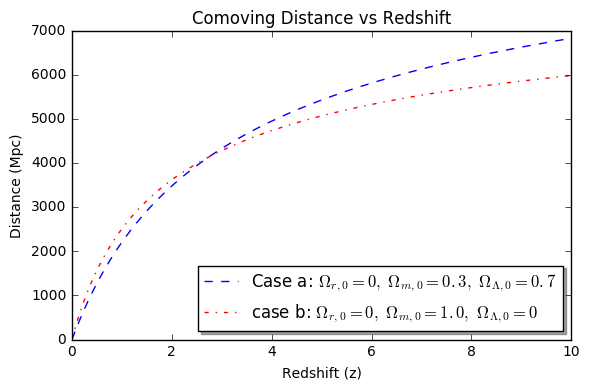

In [3]:
#Comoving distance
H_0_s = 2.2683e-18 # hubble constant in s^-1
H_0_gyr = 0.07154 # hubble constant in Gyr^-1
c = 299792458.0 #speed of light in m/s

def H_z(H_0, O_rad, O_mat, O_lam, O_curv, z):
    return H_0 * np.sqrt(O_rad * (1.0 + z) ** 4.0 + O_mat * (1.0 + z) ** 3.0 + O_lam + (1.0 - O_curv) * (1.0 + z) ** 2.0)

#Now we consider two different cases (a) with O_mat = 0.3, O_rad = 0, O_lam = 0.7, O_curv = 0
#and (b) with O_mat = 1, O_rad = 0, O_lam = 0, O_curv = 1

case_a = lambda z: c / H_z(H_0_s, 0, 0.3, 0.7, 0.0, z) #case a, lambda functions used since these are functions of z
case_b = lambda z: c / H_z(H_0_s, 0.0, 1.0, 0.0, 1.0, z) #case b, lambda functions used since  
case_a_results = np.array([])
case_b_results = np.array([])
z = np.linspace(0, 10, 500) #z from 0 to 10

#Integration in quadrature
for i in z:
    current = quad(case_a, 0, i)
    case_a_results = np.append(case_a_results, current[0])
    current = quad(case_b, 0, i)
    case_b_results = np.append(case_b_results, current[0])

case_a_results = case_a_results * 3.24e-23 # convert from meters to Mpc
case_b_results = case_b_results * 3.24e-23  # convert from meters to Mpc

plt.plot(z, case_a_results, 'b--', label="Case a: $\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, case_b_results, 'r-.', label="case b: $\Omega_{r,0}=0,\ \Omega_{m,0}=1.0,\ \Omega_{\Lambda,0}=0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Distance (Mpc)")
plt.title("Comoving Distance vs Redshift")
plt.legend(loc='lower right',numpoints=1,shadow=True)
plt.tight_layout()
plt.show()

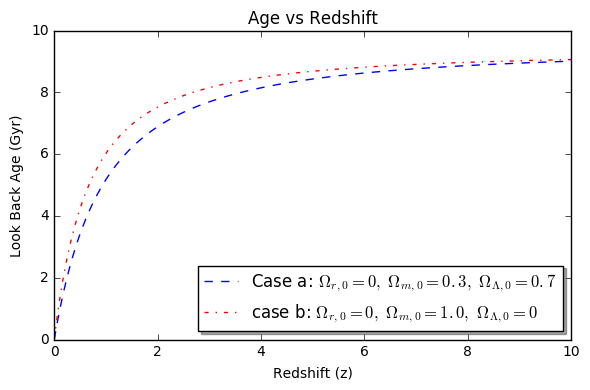

In [4]:
#Age of the Universe

case_a_t = lambda z: 1.0 /  ((1.0 + z) * H_z(H_0_gyr, 0, 0.3, 0.7, 0, z))
case_b_t = lambda z: 1.0 /  ((1.0 + z) * H_z(H_0_gyr, 0, 1.0, 0, 1.0, z)) 
case_a_t_results = np.array([])
case_b_t_results = np.array([])

#integration in quadrature
for i in z:
    current = quad(case_a_t, 0, i)
    case_a_t_results = np.append(case_a_t_results, current[0])
    current = quad(case_b_t, 0, i)
    case_b_t_results = np.append(case_b_t_results, current[0])
    
plt.plot(z, case_a_t_results, 'b--', label="Case a: $\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, case_b_t_results, 'r-.', label="case b: $\Omega_{r,0}=0,\ \Omega_{m,0}=1.0,\ \Omega_{\Lambda,0}=0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Look Back Age (Gyr)")
plt.title("Age vs Redshift")
plt.legend(loc='lower right',numpoints=1,shadow=True)
plt.tight_layout()
plt.show()

In [5]:
#Problem 3
#Start with the age of our benchmark universe which is case a
age = quad(case_a_t, 0, 100)[0]

#define case c radiation only open universe
rho_rad = 0.0 #radiation density
case_c_t = lambda z: 1.0 / ((1.0 + z) * H_z(H_0_gyr, rho_rad, 0.0, 0.0, -1.0, z))
case_c_age = quad(case_c_t, 0, 10000)[0]

#Integration in quadrature and optimization
resolution = 0.00001 #define a resolution for decimal point accuracy

#optimization
while(case_c_age >= age):
    rho_rad += resolution
    case_c_t = lambda z: 1.0 / ((1.0 + z) * H_z(H_0_gyr, rho_rad, 0.0, 0.0, -1.0, z))
    case_c_age = quad(case_c_t, 0, 10000)[0]
    
#Optimization results
print "Age of benchmark universe:",age,"Gyr" 
print "Age of matter only open universe:",case_c_age,"Gyr" 
print "Age difference between benchmark universe and matter only universe:",abs(age-case_c_age),"Gyr" 
print "Optimized energy density parameter:",rho_rad

Age of benchmark universe: 9.42371621797 Gyr
Age of matter only open universe: 9.4233780249 Gyr
Age difference between benchmark universe and matter only universe: 0.000338193075432 Gyr
Optimized energy density parameter: 0.00456
